<a href="https://colab.research.google.com/github/Christianah-O/Python-Practice/blob/main/EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import wait4
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/netflix_titles - netflix_titles.csv')

Data Understanding

In [ ]:
#preview data
df.sample(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
810,60023597,Movie,Men in Black II,Barry Sonnenfeld,"Tommy Lee Jones, Will Smith, Rip Torn, Lara Fl...",United States,"October 1, 2019",2002,PG-13,88 min,"Action & Adventure, Comedies, Sci-Fi & Fantasy",Will Smith and Tommy Lee Jones reprise their r...
5317,80986854,TV Show,I Think You Should Leave with Tim Robinson,NaN,"Tim Robinson, Andy Samberg, Sam Richardson, Wi...",United States,"April 23, 2019",2019,TV-MA,1 Season,TV Comedies,There is no such thing as an ordinary interact...
5020,80136450,TV Show,Exclusive Edition,James Lee,"Berg Lee, Yise Loo, Alvin Wong, Hady, Monday K...",NaN,"August 14, 2017",2008,TV-14,1 Season,"International TV Shows, TV Dramas",Young journalists working for a magazine juggl...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [ ]:
#check missing values
df.isna().sum().sort_values(ascending=False)

,0
director,1969
cast,570
country,476
date_added,11
rating,10
title,0
show_id,0
type,0
release_year,0
duration,0


In [ ]:
#data_added column to be converted to date time
df['date_added'] = pd.to_datetime(df['date_added'])

In [ ]:
df['date_added']

,date_added
0,2019-09-09
1,2016-09-09
2,2018-09-08
3,2018-09-08
4,2017-09-08
...,...
6229,NaT
6230,NaT
6231,NaT
6232,NaT


In [ ]:
#fill the categorical missing values with unknown
df['director'].fillna('unknown', inplace=True)
df['director']

,director
0,"Richard Finn, Tim Maltby"
1,unknown
2,unknown
3,unknown
4,Fernando Lebrija
...,...
6229,unknown
6230,unknown
6231,unknown
6232,unknown


In [ ]:
#country na filling
df['country'].fillna('unknown', inplace=True)
df['country']

,country
0,"United States, India, South Korea, China"
1,United Kingdom
2,United States
3,United States
4,United States
...,...
6229,United States
6230,United States
6231,unknown
6232,United Kingdom


Durations are in different format
some are in mins, some are in seasons.

convertingor normalize our duration to all be in minutes

In [ ]:
#duration normalizing
def convert_duration(duration):
  if 'min' in duration:
    return int(duration.replace(' min', '' ))
  elif 'season' in duration:
      num_season= int(duration.replace(' season', ''))
      return num_season * 50 #average mins per season
df['duration'] = df['duration'].apply(convert_duration)


In [ ]:
df['duration'].unique()

array([ 90.,  94.,  nan,  99., 110.,  60.,  78.,  95.,  58.,  62.,  65.,
        61., 135.,  98.,  96.,  79., 113.,  80.,  77., 112., 106., 102.,
       114., 125., 142., 133., 100.,  86., 146.,  10., 122., 126., 116.,
       130.,  70., 128.,  88., 108.,  93.,  64., 107.,  92., 111., 103.,
        40.,  85.,  72.,  45.,  89.,  24., 127., 163., 117.,  42., 104.,
        75.,  82.,  38.,  97.,  81.,  91., 152.,  87., 121., 101., 119.,
        83., 182., 124.,  63., 139., 171.,  84.,  69.,  76.,  41., 153.,
       141.,  52., 137., 132., 157., 109., 105.,  25.,  71., 123.,  67.,
       140., 138., 149.,  47.,  68., 148.,  54., 151., 155., 162.,  28.,
       160.,  29.,  57.,  46.,  73.,  74., 118.,  66.,  14.,  20., 115.,
        48., 168., 144., 161.,  55.,  56.,  51.,  50.,  23., 205., 190.,
       131.,  22.,  59., 150., 159., 145., 158., 143., 154., 147., 129.,
       214., 136., 134.,  44., 156.,  30., 120., 209., 166., 200., 185.,
        36.,  11.,  53., 165., 164.,  19., 177.,  3

<Axes: xlabel='listed_in'>

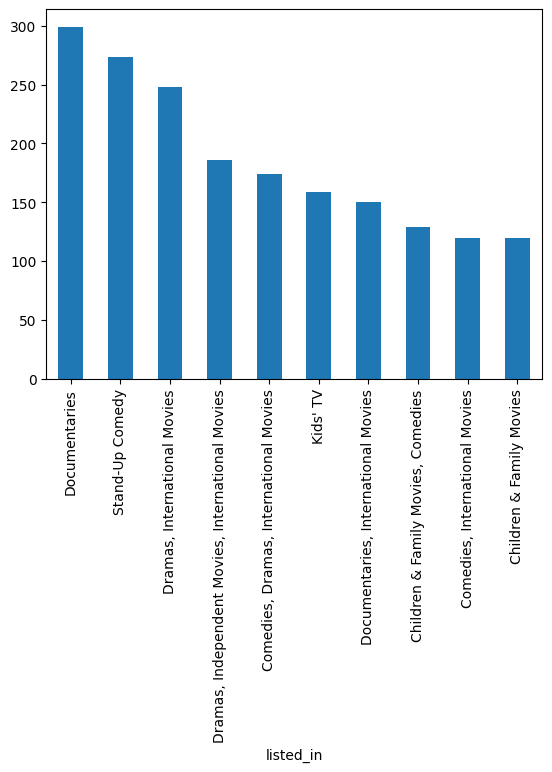

In [ ]:
df['listed_in'].value_counts().head(10).plot(kind='bar')


listed_in will be splitters into genres to make data more clean and understable

In [ ]:
df['listed_in'].str.split(',')

,listed_in
0,"[Children & Family Movies, Comedies]"
1,[Stand-Up Comedy]
2,[Kids' TV]
3,[Kids' TV]
4,[Comedies]
...,...
6229,"[TV Action & Adventure, TV Comedies, TV Sci-..."
6230,[TV Comedies]
6231,[Movies]
6232,"[British TV Shows, TV Comedies, TV Dramas]"


In [ ]:
#to explode it
Genre = df['listed_in'].str.split(',').explode()

In [ ]:
Genre.value_counts()

,count
listed_in,
International Movies,1842
Dramas,1077
Comedies,803
Documentaries,644
Action & Adventure,597
...,...
Classic & Cult TV,5
Romantic Movies,2
Spanish-Language TV Shows,1


<Axes: xlabel='listed_in'>

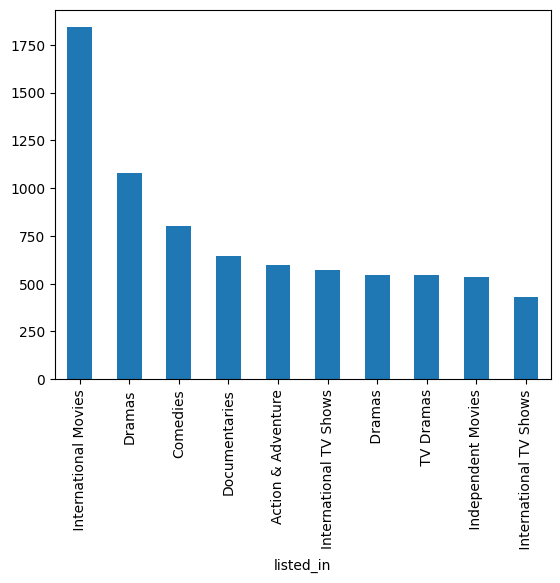

In [ ]:
Genre.value_counts().head(10).plot(kind='bar')

Visualization of the cast uskng word cloud( for text visulization)

In [ ]:
from wordcloud import WordCloud

In [ ]:
df['cast'].isna().sum()

np.int64(570)

In [ ]:
#drop na
df['cast'].dropna().str.replace(',', ' ')

,cast
0,Alan Marriott Andrew Toth Brian Dobson Cole...
1,Jandino Asporaat
2,Peter Cullen Sumalee Montano Frank Welker J...
3,Will Friedle Darren Criss Constance Zimmer ...
4,Nesta Cooper Kate Walsh John Michael Higgins...
...,...
6228,Igor Dmitriev
6229,Burnie Burns Jason Saldaña Gustavo Sorola G...
6230,Marc Maron Judd Hirsch Josh Brener Nora Zeh...
6232,Daniel Radcliffe Jon Hamm Adam Godley Chris...


In [ ]:
#to join them all to become text dara
cast_text = ' '.join(df['cast'].dropna().str.replace(',', ' '))
cast_text

'Alan Marriott  Andrew Toth  Brian Dobson  Cole Howard  Jennifer Cameron  Jonathan Holmes  Lee Tockar  Lisa Durupt  Maya Kay  Michael Dobson Jandino Asporaat Peter Cullen  Sumalee Montano  Frank Welker  Jeffrey Combs  Kevin Michael Richardson  Tania Gunadi  Josh Keaton  Steve Blum  Andy Pessoa  Ernie Hudson  Daran Norris  Will Friedle Will Friedle  Darren Criss  Constance Zimmer  Khary Payton  Mitchell Whitfield  Stuart Allan  Ted McGinley  Peter Cullen Nesta Cooper  Kate Walsh  John Michael Higgins  Keith Powers  Alicia Sanz  Jake Borelli  Kid Ink  Yousef Erakat  Rebekah Graf  Anne Winters  Peter Gilroy  Patrick Davis Alberto Ammann  Eloy Azorín  Verónica Echegui  Lucía Jiménez  Claudia Traisac Antonio Banderas  Dylan McDermott  Melanie Griffith  Birgitte Hjort Sørensen  Robert Forster  Christa Campbell  Tim McInnerny  Andy Nyman  David Ryall Fabrizio Copano James Franco  Kate Hudson  Tom Wilkinson  Omar Sy  Sam Spruell  Anna Friel  Thomas Arnold  Oliver Dimsdale  Diana Hardcastle  Mi

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

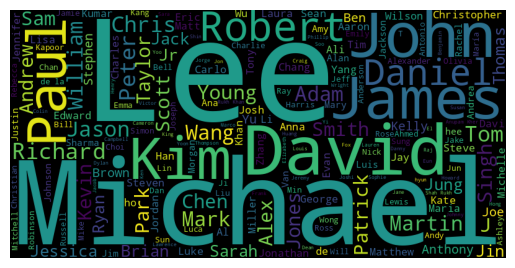

In [ ]:
visual = WordCloud(width=800, height=400).generate(cast_text)
plt.imshow(visual)
plt.axis('off')